In [1]:
import os
import zipfile
import polars as pl

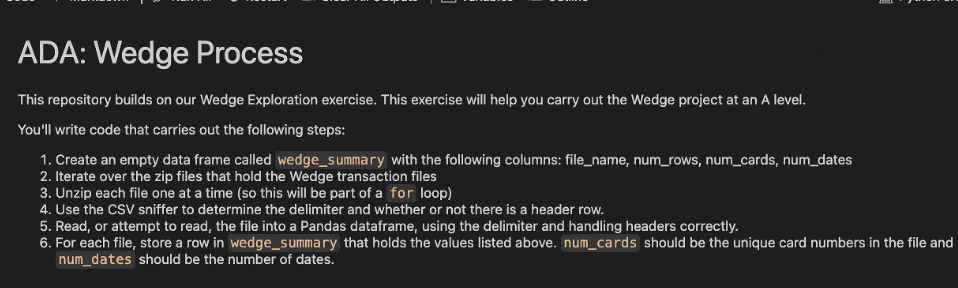

In [2]:
wedge_summary = pl.DataFrame({
    "file_name": [],
    "num_rows": [],
    "num_cols": [],
    "num_cards": [],
    "num_dates": []
})

In [3]:
#os.listdir("data/WedgeZipOfZips")
data_directory = "E:\\College\\Fall 2024\\ADA\\Wedge\\Wedge_Project\\data\\unzipped\\"

## Exploring the Files

The cell below is exploring the zip file before we unzipped.

In [4]:
# for file in os.listdir("data/WedgeZipOfZips"):
#     with zipfile.ZipFile(data_directory + file, 'r') as zip_ref:
#         # List the contents of the zip file
#         file_list = zip_ref.namelist()
#         print(f"Contents of the {file} file:")
#         for idx,file in enumerate(file_list):
#             print(idx)
            

Counting the files.

In [5]:
filecount = 0
for idx, file in enumerate(os.listdir(data_directory)):
    filecount = idx

print(filecount)

52


### Extracting

In [6]:
# for file in os.listdir("data/WedgeZipOfZips"):
#     with zipfile.ZipFile(data_directory + file, 'r') as zip_ref:
#         # List the contents of the zip file
#         file_list = zip_ref.namelist()
#         print(f"Contents of the {file} file:")
#         for idx,file in enumerate(file_list):
#             zip_ref.extractall(r"E:\College\Fall 2024\ADA\Wedge\Wedge_Project\data\unzipped")

In [14]:
# Need to put all csvs into there own dfs
#https://chatgpt.com/share/66e4ad8b-ea5c-8000-9117-d884dd0bbfb3


# Initialize an empty list to store LazyFrames
lazy_df_list = []

# Loop through files and load lazily
for file in os.listdir(data_directory):
    file_path = os.path.join(data_directory, file)
    
    # Use LazyFrame for efficient processing
    lazy_df = pl.scan_csv(file_path, has_header=True, null_values=["\\N"], ignore_errors=True)
    
    # Append LazyFrame to the list
    lazy_df_list.append(lazy_df)

# Example: Materialize (collect) one of the lazy DataFrames to inspect it
df = lazy_df_list[0].collect()
#df1 = lazy_df_list[38].collect()
print(df.head())

columns = df.columns

shape: (5, 50)
┌─────────────────────┬─────────────┬────────┬──────────┬───┬───────┬────────┬──────────┬──────────┐
│ datetime            ┆ register_no ┆ emp_no ┆ trans_no ┆ … ┆ store ┆ branch ┆ match_id ┆ trans_id │
│ ---                 ┆ ---         ┆ ---    ┆ ---      ┆   ┆ ---   ┆ ---    ┆ ---      ┆ ---      │
│ str                 ┆ i64         ┆ i64    ┆ i64      ┆   ┆ i64   ┆ i64    ┆ i64      ┆ i64      │
╞═════════════════════╪═════════════╪════════╪══════════╪═══╪═══════╪════════╪══════════╪══════════╡
│ 2010-01-01 09:04:09 ┆ 5           ┆ 17     ┆ 2        ┆ … ┆ 1     ┆ 0      ┆ 0        ┆ 1        │
│ 2010-01-01 09:04:12 ┆ 5           ┆ 17     ┆ 2        ┆ … ┆ 1     ┆ 0      ┆ 0        ┆ 3        │
│ 2010-01-01 09:04:15 ┆ 5           ┆ 17     ┆ 2        ┆ … ┆ 1     ┆ 0      ┆ 0        ┆ 4        │
│ 2010-01-01 09:04:18 ┆ 5           ┆ 17     ┆ 2        ┆ … ┆ 1     ┆ 0      ┆ 0        ┆ 5        │
│ 2010-01-01 09:04:21 ┆ 5           ┆ 17     ┆ 2        ┆ … ┆ 1     ┆ 0     

In [16]:
wedge_summary = pl.DataFrame({})

# Loop through the lazyframes and create a summary
for idx, lazy_df in enumerate(lazy_df_list):

    try:
        new_row = pl.DataFrame({
            "file_name": [f"{os.listdir(data_directory)[idx]}"],
            "num_rows": [lazy_df.select(pl.len()).collect()[0, 0]],
            "num_cols": [len(lazy_df.columns)],
            "num_cards": [str(lazy_df.select(pl.col("card_no").n_unique()).collect()[0, 0])],
            "num_dates": [str(lazy_df.select(pl.col("datetime").n_unique()).collect()[0, 0])]
    })

    except:

        try:
            column_sub_df = lazy_df_list[idx].collect()
            column_sub_df.columns = columns

            new_row = pl.DataFrame({
            "file_name": [f"{os.listdir(data_directory)[idx]}"],
            "num_rows": [lazy_df.select(pl.len()).collect()[0, 0]],
            "num_cols": [len(lazy_df.columns)],
            "num_cards": [str(lazy_df.select(pl.col("card_no").n_unique()).collect()[0, 0])],
            "num_dates": [str(lazy_df.select(pl.col("datetime").n_unique()).collect()[0, 0])]
            })
            


        except:

            try:


                new_row = pl.DataFrame({
                    "file_name": [f"{os.listdir(data_directory)[idx]}"],
                    "num_rows": [lazy_df.select(pl.len()).collect()[0, 0]],
                    "num_cols": [len(lazy_df.columns)],
                    "num_cards": ["N/A"],
                    "num_dates": [str(lazy_df.select(pl.col("datetime").n_unique()).collect()[0, 0])]
                })
            
            except:
                new_row = pl.DataFrame({
                "file_name": [f"{os.listdir(data_directory)[idx]}"],
                "num_rows": [lazy_df.select(pl.len()).collect()[0, 0]],
                "num_cols": [len(lazy_df.columns)],
                "num_cards": ["N/A"],
                "num_dates": ["N/A"]
        })
    
    wedge_summary = wedge_summary.vstack(new_row)

C:\Users\justi\AppData\Local\Temp\ipykernel_26020\935971483.py:10: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  "num_cols": [len(lazy_df.columns)],
C:\Users\justi\AppData\Local\Temp\ipykernel_26020\935971483.py:39: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  "num_cols": [len(lazy_df.columns)],
C:\Users\justi\AppData\Local\Temp\ipykernel_26020\935971483.py:48: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  "num_cols": [len(lazy_df.columns)],
C:\User

In [9]:
df1 = lazy_df_list[0].collect()
df2 = lazy_df_list[1].collect()

In [10]:
df1 = df1.vstack(df2)

## Sectioning DFs :D -- TK


The file transArchive_201001_201003.csv


In [17]:
issue_dfs = []
df_section1 = pl.DataFrame({})
df_section2 = pl.DataFrame({})
df_section3 = pl.DataFrame({})
df_section4 = pl.DataFrame({})
df_section5 = pl.DataFrame({})

# Assuming lazy_df_list contains file paths

# Loop through the lazyframes and append to respective dataframes
for idx, lazy_df in enumerate(lazy_df_list):
    try:
        # Add 'filename' column to the lazy dataframe (using string, not LazyFrame)
        lazy_df_with_filename = lazy_df.with_columns(pl.lit(f"{os.listdir(data_directory)[idx]}").alias("filename"))
        
        # Collect the dataframe (execute lazy operations) with error handling
        df_with_filename = lazy_df_with_filename.collect(null_values=["NULL"], ignore_errors=True)

        # Append files to their respective sections
        if idx < 10:
            df_section1 = df_section1.vstack(df_with_filename)
        elif 10 <= idx < 20:
            df_section2 = df_section2.vstack(df_with_filename)
        elif 20 <= idx < 30:
            df_section3 = df_section3.vstack(df_with_filename)
        elif 30 <= idx < 40:
            df_section4 = df_section4.vstack(df_with_filename)
        else:
            df_section5 = df_section5.vstack(df_with_filename)

    except Exception as e:
        print(f"Error with lazyframe at index: {idx}\nError: {str(e)}")

        # Add 'filename' column to the lazy dataframe (using string, not LazyFrame)
        lazy_df_with_filename = lazy_df.with_columns(pl.lit(f"{os.listdir(data_directory)[idx]}").alias("filename"))
        
        # Collect the dataframe (execute lazy operations) with error handling
        df_with_filename = lazy_df_with_filename.collect(null_values=["NULL"], ignore_errors=True)

        # Append problematic DataFrame to issue_dfs
        issue_dfs.append(df_with_filename)

Error with lazyframe at index: 3
Error: could not parse `NULL` as dtype `i64` at column 'staff' (column number 35)

The current offset in the file is 381199340 bytes.

You might want to try:
- increasing `infer_schema_length` (e.g. `infer_schema_length=10000`),
- specifying correct dtype with the `dtypes` argument
- setting `ignore_errors` to `True`,
- adding `NULL` to the `null_values` list.

Original error: ```remaining bytes non-empty```


ComputeError: could not parse `NULL` as dtype `i64` at column 'staff' (column number 35)

The current offset in the file is 435656436 bytes.

You might want to try:
- increasing `infer_schema_length` (e.g. `infer_schema_length=10000`),
- specifying correct dtype with the `dtypes` argument
- setting `ignore_errors` to `True`,
- adding `NULL` to the `null_values` list.

Original error: ```remaining bytes non-empty```

Index 3, 4, 5 and 35 broke. 